In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
titanic = sns.load_dataset("titanic")
print(titanic.head())
print(titanic.describe())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.3815

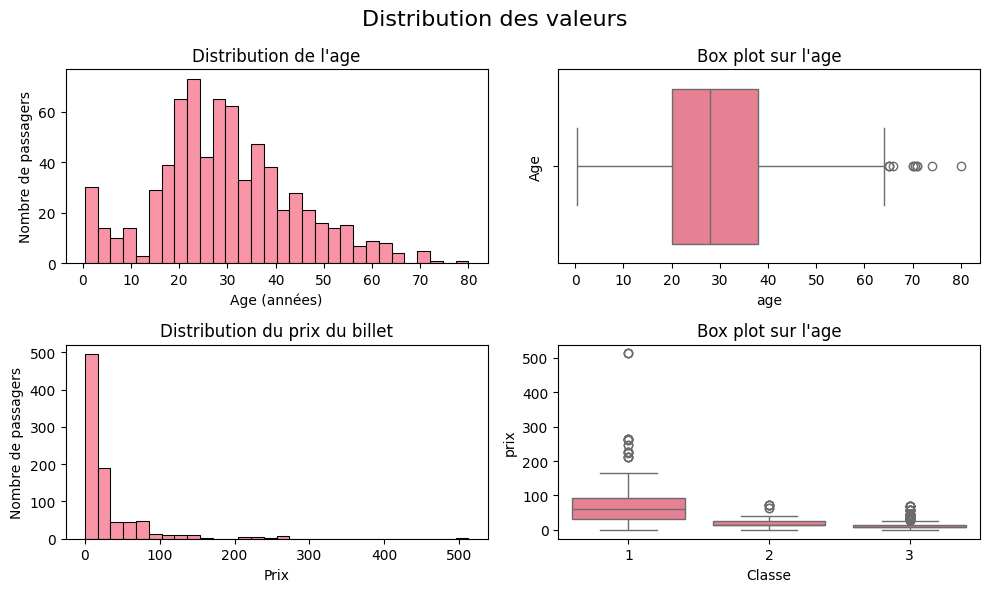

In [10]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Distribution des valeurs', fontsize=16)

sns.histplot(data=titanic, x="age", bins=30, ax=axes[0,0])
axes[0,0].set_title("Distribution de l'age")
axes[0,0].set_xlabel("Age (années)")
axes[0,0].set_ylabel("Nombre de passagers")

sns.boxplot(data=titanic, x="age", ax=axes[0,1])
axes[0,1].set_title("Box plot sur l'age")
axes[0,1].set_ylabel("Age")

sns.histplot(data=titanic, x="fare", bins=30, ax=axes[1,0])
axes[1,0].set_title("Distribution du prix du billet")
axes[1,0].set_xlabel("Prix")
axes[1,0].set_ylabel("Nombre de passagers")

sns.boxplot(data=titanic, x="pclass", y="fare", ax=axes[1,1])
axes[1,1].set_title("Box plot sur l'age")
axes[1,1].set_xlabel("Classe")
axes[1,1].set_ylabel("prix")

plt.tight_layout()

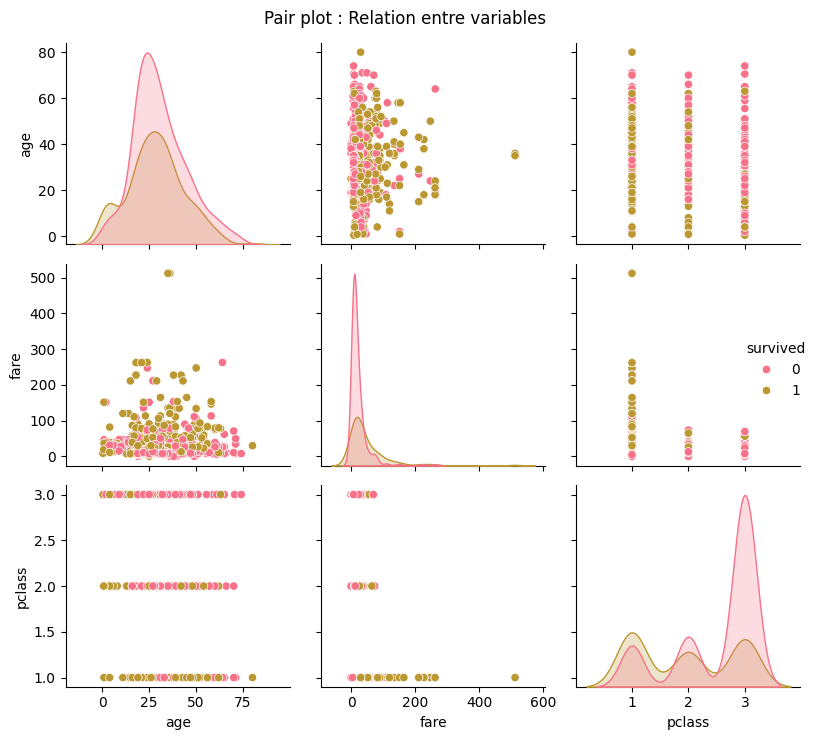

In [ ]:
columns_data = ["age", "fare", "pclass", "survived"]

sns.pairplot(data=titanic[columns_data], hue='survived')
plt.suptitle("Pair plot : Relation entre variables")

plt.tight_layout()

In [18]:
# Méthode détection des outlers

Q1 = titanic["age"].quantile(0.25)
Q3 = titanic["age"].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = (titanic["age"] < seuil_bas) | (titanic["age"] > seuil_haut)
print(outliers)

titanic_clean = titanic[(titanic["age"] >= seuil_bas) & (titanic["age"] <= seuil_haut)]
print(titanic.count())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool
survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64
